# Important Headers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import random
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.layers import BatchNormalization, SeparableConv2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img

# Reading From Train File And Preproccessing That

Found 12230 images belonging to 2 classes.


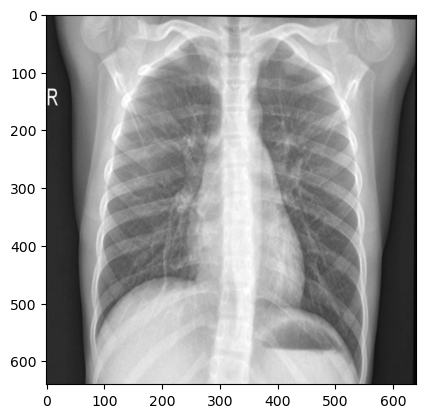

(640, 640)


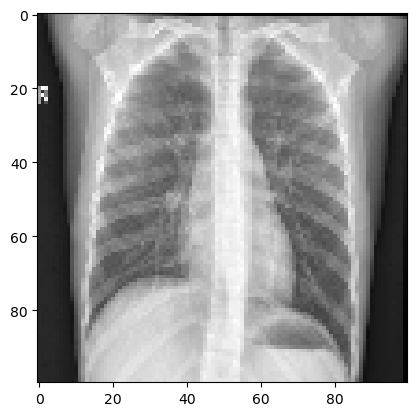

<class 'numpy.ndarray'>


In [5]:
DATA_TRAIN = "train"
CATEGORIES_TRAIN = ["NORMAL", "PNEUMONIA"]

IMG_SIZE = 100

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

training_data = train_datagen.flow_from_directory(
    DATA_TRAIN,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary',
    classes=CATEGORIES_TRAIN)

for category in CATEGORIES_TRAIN:
    path = os.path.join(DATA_TRAIN, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array.shape)

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

training_data = []

def create_training_data():
    for category in CATEGORIES_TRAIN:
        path = os.path.join(DATA_TRAIN, category)
        class_num = CATEGORIES_TRAIN.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)

x_train = []
y_train = []

for features, label in training_data:
    x_train.append(features)
    y_train.append(label)

x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)
print(type(y_train))

# Reading From Test File And Preproccessing That

Found 582 images belonging to 2 classes.


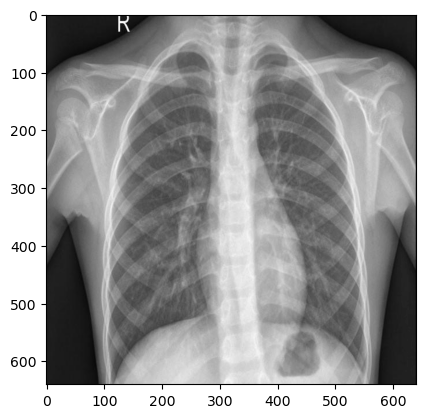

(640, 640)


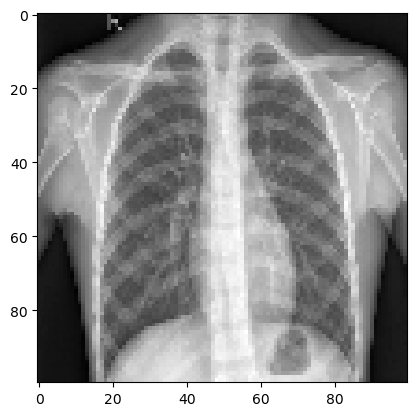

<class 'numpy.ndarray'>


In [6]:
DATADIR_TEST = "test"
CATEGORIES_TEST = ["NORMAL", "PNEUMONIA"]
IMG_SIZE = 100

test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

testing_data = test_datagen.flow_from_directory(
    DATADIR_TEST,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary',
    classes=CATEGORIES_TEST)


for category in CATEGORIES_TEST:
    path = os.path.join(DATADIR_TEST, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array.shape)

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

testing_data = []

def create_testing_data():
    for category in CATEGORIES_TEST:
        path = os.path.join(DATADIR_TEST, category)
        class_num = CATEGORIES_TEST.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass

create_testing_data()

import random

random.shuffle(testing_data)

x_test = []
y_test = []

for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)

x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)
print(type(y_test))

# Reading From Validation File And Preproccessing That

Found 582 images belonging to 2 classes.


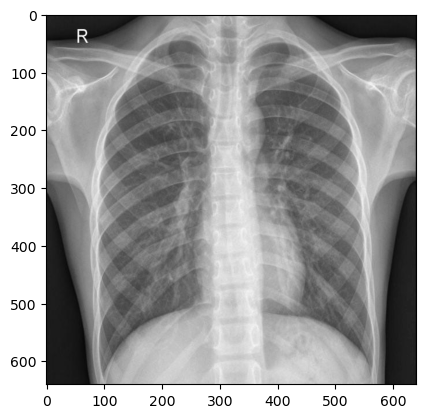

(640, 640)


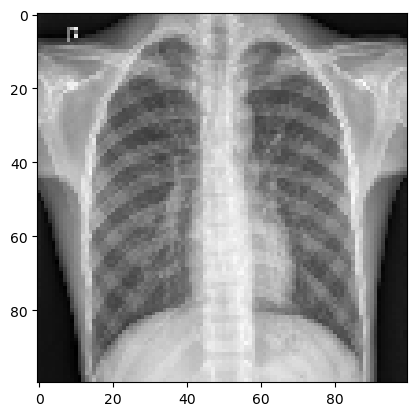

<class 'numpy.ndarray'>


In [7]:
DATADIR_VAL = "valid"
CATEGORIES_VAL = ["NORMAL", "PNEUMONIA"]
IMG_SIZE = 100


val_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

validation_data = val_datagen.flow_from_directory(
    DATADIR_TEST,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary',
    classes=CATEGORIES_VAL)



for category in CATEGORIES_VAL:
    path = os.path.join(DATADIR_VAL, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array.shape)

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

validation_data = []

def create_validation_data():
    for category in CATEGORIES_VAL:
        path = os.path.join(DATADIR_VAL, category)
        class_num = CATEGORIES_VAL.index(category)
        #print(class_num, " + ",category)
        #print(type(class_num), " + ",type(category))
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                #print(new_array, class_num)
                validation_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_validation_data()      


import random

random.shuffle(validation_data)



x_val = []
y_val = []

for features, label in validation_data:
    x_val.append(features)
    y_val.append(label)

x_val = np.array(x_val).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)
print(type(y_val))

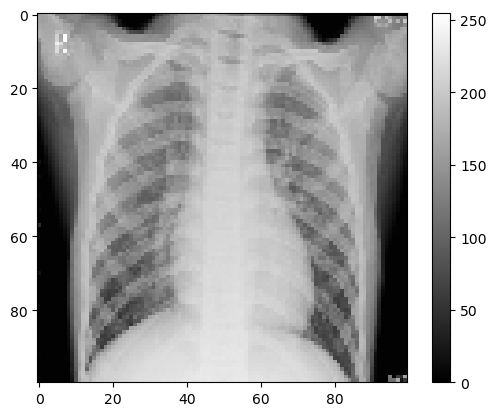

In [8]:
plt.figure()
plt.imshow(x_train[2000],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

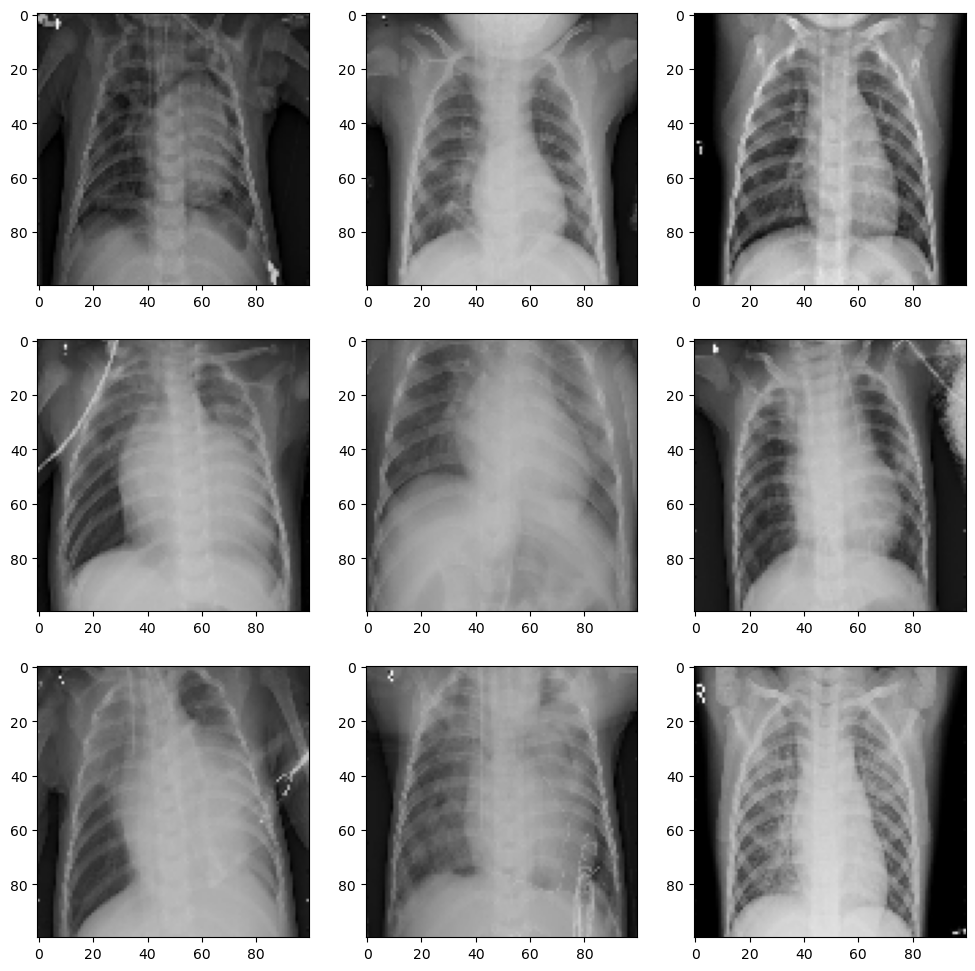

In [9]:
codition = 'PNEUMONIA'

plt.figure(figsize = (12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(DATADIR_TEST + '/' + codition + '/' + os.listdir(DATADIR_TEST + '/' + codition)[i], target_size = (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
plt.show()

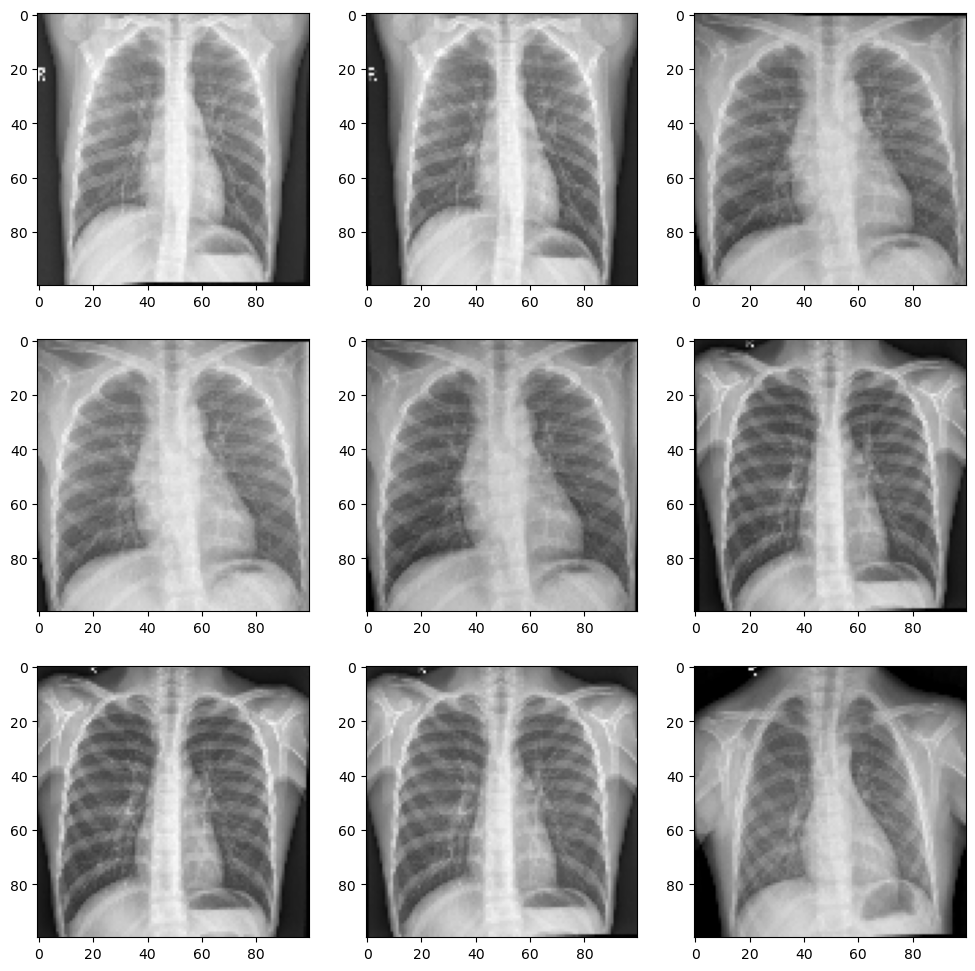

In [10]:
codition = 'NORMAL'

plt.figure(figsize = (12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(DATA_TRAIN + '/' + codition + '/' + os.listdir(DATA_TRAIN + '/' + codition)[i], target_size = (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
plt.show()

# Review Number Of Images And Size After Resize them In 3 Files

In [11]:

print(x_train.shape)
print(y_train.shape)
print("/=====================/")
print(x_test.shape)
print(y_test.shape)
print("/=====================/")
print(x_val.shape)
print(y_val.shape)


(12230, 100, 100, 1)
(12230,)
/=====================/
(582, 100, 100, 1)
(582,)
/=====================/
(1165, 100, 100, 1)
(1165,)


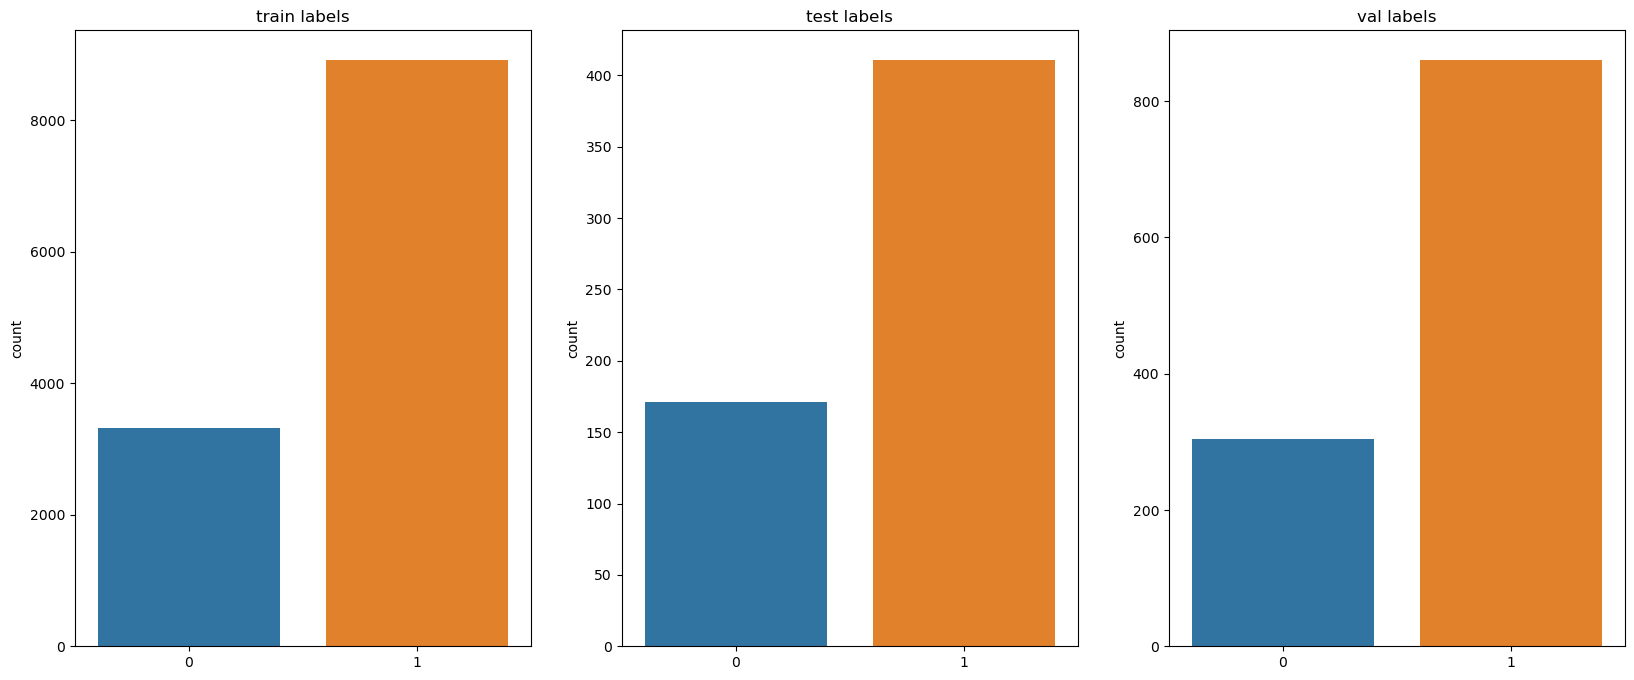

In [12]:
import seaborn as sns
plt.figure(10 , figsize = (20 ,8))
n = 0 
for z , j in zip([y_train , y_test, y_val] , ['train labels','test labels', 'val labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

# Model [ EfficientNet B7 ]

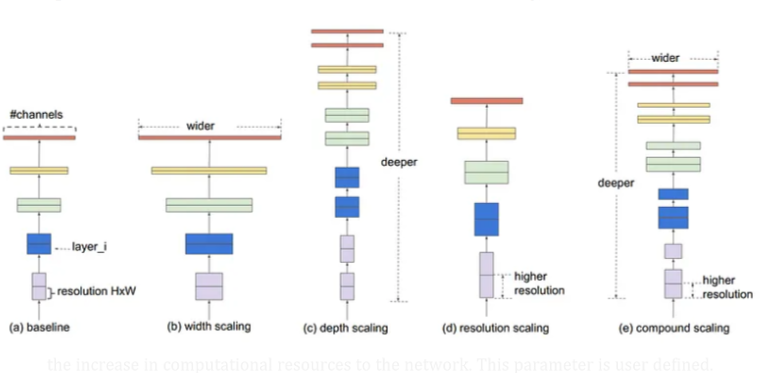


In [13]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import Lambda


# Load pre-trained model (excluding top layers)
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add a lambda layer to convert gray images to RGB images
gray_to_rgb = Lambda(lambda x: tf.tile(x, [1, 1, 1, 3]))
x = gray_to_rgb(base_model.output)

# Add a global average pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add a decoder layer
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)


# Add a sigmoid layer for binary classification
output_layer = tf.keras.layers.Dense(units=2, activation='softmax')(x)

# Define the model
model = tf.keras.models.Model(inputs=base_model.input, outputs=output_layer)

# Set trainable layers
for layer in model.layers[:-3]:
    layer.trainable = False

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])



# Print model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 100, 100, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 100, 100, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 100, 100, 3)  0           ['normalization[0][0]']      

 block1c_activation (Activation  (None, 50, 50, 32)  0           ['block1c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block1c_se_squeeze (GlobalAver  (None, 32)          0           ['block1c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block1c_se_reshape (Reshape)   (None, 1, 1, 32)     0           ['block1c_se_squeeze[0][0]']     
                                                                                                  
 block1c_se_reduce (Conv2D)     (None, 1, 1, 8)      264         ['block1c_se_reshape[0][0]']     
                                                                                                  
 block1c_s

 block2a_se_expand (Conv2D)     (None, 1, 1, 192)    1728        ['block2a_se_reduce[0][0]']      
                                                                                                  
 block2a_se_excite (Multiply)   (None, 25, 25, 192)  0           ['block2a_activation[0][0]',     
                                                                  'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, 25, 25, 48)   9216        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 25, 25, 48)  192         ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_e

 block2c_drop (Dropout)         (None, 25, 25, 48)   0           ['block2c_project_bn[0][0]']     
                                                                                                  
 block2c_add (Add)              (None, 25, 25, 48)   0           ['block2c_drop[0][0]',           
                                                                  'block2b_add[0][0]']            
                                                                                                  
 block2d_expand_conv (Conv2D)   (None, 25, 25, 288)  13824       ['block2c_add[0][0]']            
                                                                                                  
 block2d_expand_bn (BatchNormal  (None, 25, 25, 288)  1152       ['block2d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2d_e

 block2f_expand_conv (Conv2D)   (None, 25, 25, 288)  13824       ['block2e_add[0][0]']            
                                                                                                  
 block2f_expand_bn (BatchNormal  (None, 25, 25, 288)  1152       ['block2f_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2f_expand_activation (Act  (None, 25, 25, 288)  0          ['block2f_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2f_dwconv (DepthwiseConv2  (None, 25, 25, 288)  2592       ['block2f_expand_activation[0][0]
 D)                                                              ']                               
          

 block3a_expand_activation (Act  (None, 25, 25, 288)  0          ['block3a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3a_dwconv_pad (ZeroPaddin  (None, 29, 29, 288)  0          ['block3a_expand_activation[0][0]
 g2D)                                                            ']                               
                                                                                                  
 block3a_dwconv (DepthwiseConv2  (None, 13, 13, 288)  7200       ['block3a_dwconv_pad[0][0]']     
 D)                                                                                               
                                                                                                  
 block3a_bn (BatchNormalization  (None, 13, 13, 288)  1152       ['block3a_dwconv[0][0]']         
 )        

 )                                                                                                
                                                                                                  
 block3c_activation (Activation  (None, 13, 13, 480)  0          ['block3c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3c_se_squeeze (GlobalAver  (None, 480)         0           ['block3c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3c_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3c_se_squeeze[0][0]']     
                                                                                                  
 block3c_s

 block3e_se_squeeze (GlobalAver  (None, 480)         0           ['block3e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3e_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3e_se_squeeze[0][0]']     
                                                                                                  
 block3e_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3e_se_reshape[0][0]']     
                                                                                                  
 block3e_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block3e_se_reduce[0][0]']      
                                                                                                  
 block3e_se_excite (Multiply)   (None, 13, 13, 480)  0           ['block3e_activation[0][0]',     
          

 block3g_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3g_se_reshape[0][0]']     
                                                                                                  
 block3g_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block3g_se_reduce[0][0]']      
                                                                                                  
 block3g_se_excite (Multiply)   (None, 13, 13, 480)  0           ['block3g_activation[0][0]',     
                                                                  'block3g_se_expand[0][0]']      
                                                                                                  
 block3g_project_conv (Conv2D)  (None, 13, 13, 80)   38400       ['block3g_se_excite[0][0]']      
                                                                                                  
 block3g_project_bn (BatchNorma  (None, 13, 13, 80)  320         ['block3g_project_conv[0][0]']   
 lization)

 block4b_project_conv (Conv2D)  (None, 7, 7, 160)    153600      ['block4b_se_excite[0][0]']      
                                                                                                  
 block4b_project_bn (BatchNorma  (None, 7, 7, 160)   640         ['block4b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_drop (Dropout)         (None, 7, 7, 160)    0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_add (Add)              (None, 7, 7, 160)    0           ['block4b_drop[0][0]',           
                                                                  'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_e

 block4d_drop (Dropout)         (None, 7, 7, 160)    0           ['block4d_project_bn[0][0]']     
                                                                                                  
 block4d_add (Add)              (None, 7, 7, 160)    0           ['block4d_drop[0][0]',           
                                                                  'block4c_add[0][0]']            
                                                                                                  
 block4e_expand_conv (Conv2D)   (None, 7, 7, 960)    153600      ['block4d_add[0][0]']            
                                                                                                  
 block4e_expand_bn (BatchNormal  (None, 7, 7, 960)   3840        ['block4e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4e_e

 block4g_expand_conv (Conv2D)   (None, 7, 7, 960)    153600      ['block4f_add[0][0]']            
                                                                                                  
 block4g_expand_bn (BatchNormal  (None, 7, 7, 960)   3840        ['block4g_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4g_expand_activation (Act  (None, 7, 7, 960)   0           ['block4g_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4g_dwconv (DepthwiseConv2  (None, 7, 7, 960)   8640        ['block4g_expand_activation[0][0]
 D)                                                              ']                               
          

 block4i_expand_activation (Act  (None, 7, 7, 960)   0           ['block4i_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4i_dwconv (DepthwiseConv2  (None, 7, 7, 960)   8640        ['block4i_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4i_bn (BatchNormalization  (None, 7, 7, 960)   3840        ['block4i_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4i_activation (Activation  (None, 7, 7, 960)   0           ['block4i_bn[0][0]']             
 )        

                                                                                                  
 block5a_bn (BatchNormalization  (None, 7, 7, 960)   3840        ['block5a_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block5a_activation (Activation  (None, 7, 7, 960)   0           ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 960)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_s

 block5c_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5c_se_squeeze[0][0]']     
                                                                                                  
 block5c_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5c_se_reshape[0][0]']     
                                                                                                  
 block5c_se_expand (Conv2D)     (None, 1, 1, 1344)   76608       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 7, 7, 1344)   0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 7, 7, 224)    301056      ['block5c_se_excite[0][0]']      
          

                                                                                                  
 block5e_se_excite (Multiply)   (None, 7, 7, 1344)   0           ['block5e_activation[0][0]',     
                                                                  'block5e_se_expand[0][0]']      
                                                                                                  
 block5e_project_conv (Conv2D)  (None, 7, 7, 224)    301056      ['block5e_se_excite[0][0]']      
                                                                                                  
 block5e_project_bn (BatchNorma  (None, 7, 7, 224)   896         ['block5e_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5e_drop (Dropout)         (None, 7, 7, 224)    0           ['block5e_project_bn[0][0]']     
          

                                                                                                  
 block5g_project_bn (BatchNorma  (None, 7, 7, 224)   896         ['block5g_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5g_drop (Dropout)         (None, 7, 7, 224)    0           ['block5g_project_bn[0][0]']     
                                                                                                  
 block5g_add (Add)              (None, 7, 7, 224)    0           ['block5g_drop[0][0]',           
                                                                  'block5f_add[0][0]']            
                                                                                                  
 block5h_expand_conv (Conv2D)   (None, 7, 7, 1344)   301056      ['block5g_add[0][0]']            
          

                                                                                                  
 block5i_add (Add)              (None, 7, 7, 224)    0           ['block5i_drop[0][0]',           
                                                                  'block5h_add[0][0]']            
                                                                                                  
 block5j_expand_conv (Conv2D)   (None, 7, 7, 1344)   301056      ['block5i_add[0][0]']            
                                                                                                  
 block5j_expand_bn (BatchNormal  (None, 7, 7, 1344)  5376        ['block5j_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5j_expand_activation (Act  (None, 7, 7, 1344)  0           ['block5j_expand_bn[0][0]']      
 ivation) 

 ization)                                                                                         
                                                                                                  
 block6b_expand_activation (Act  (None, 4, 4, 2304)  0           ['block6b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, 4, 4, 2304)  57600       ['block6b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6b_bn (BatchNormalization  (None, 4, 4, 2304)  9216        ['block6b_dwconv[0][0]']         
 )                                                                                                
          

 block6d_dwconv (DepthwiseConv2  (None, 4, 4, 2304)  57600       ['block6d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6d_bn (BatchNormalization  (None, 4, 4, 2304)  9216        ['block6d_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6d_activation (Activation  (None, 4, 4, 2304)  0           ['block6d_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6d_se_squeeze (GlobalAver  (None, 2304)        0           ['block6d_activation[0][0]']     
 agePoolin

                                                                                                  
 block6f_activation (Activation  (None, 4, 4, 2304)  0           ['block6f_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6f_se_squeeze (GlobalAver  (None, 2304)        0           ['block6f_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6f_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6f_se_squeeze[0][0]']     
                                                                                                  
 block6f_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6f_se_reshape[0][0]']     
          

 agePooling2D)                                                                                    
                                                                                                  
 block6h_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6h_se_squeeze[0][0]']     
                                                                                                  
 block6h_se_reduce (Conv2D)     (None, 1, 1, 96)     221280      ['block6h_se_reshape[0][0]']     
                                                                                                  
 block6h_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6h_se_reduce[0][0]']      
                                                                                                  
 block6h_se_excite (Multiply)   (None, 4, 4, 2304)   0           ['block6h_activation[0][0]',     
                                                                  'block6h_se_expand[0][0]']      
          

                                                                                                  
 block6j_se_expand (Conv2D)     (None, 1, 1, 2304)   223488      ['block6j_se_reduce[0][0]']      
                                                                                                  
 block6j_se_excite (Multiply)   (None, 4, 4, 2304)   0           ['block6j_activation[0][0]',     
                                                                  'block6j_se_expand[0][0]']      
                                                                                                  
 block6j_project_conv (Conv2D)  (None, 4, 4, 384)    884736      ['block6j_se_excite[0][0]']      
                                                                                                  
 block6j_project_bn (BatchNorma  (None, 4, 4, 384)   1536        ['block6j_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block6l_project_conv (Conv2D)  (None, 4, 4, 384)    884736      ['block6l_se_excite[0][0]']      
                                                                                                  
 block6l_project_bn (BatchNorma  (None, 4, 4, 384)   1536        ['block6l_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6l_drop (Dropout)         (None, 4, 4, 384)    0           ['block6l_project_bn[0][0]']     
                                                                                                  
 block6l_add (Add)              (None, 4, 4, 384)    0           ['block6l_drop[0][0]',           
                                                                  'block6k_add[0][0]']            
          

                                                                                                  
 block7b_expand_conv (Conv2D)   (None, 4, 4, 3840)   2457600     ['block7a_project_bn[0][0]']     
                                                                                                  
 block7b_expand_bn (BatchNormal  (None, 4, 4, 3840)  15360       ['block7b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7b_expand_activation (Act  (None, 4, 4, 3840)  0           ['block7b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7b_dwconv (DepthwiseConv2  (None, 4, 4, 3840)  34560       ['block7b_expand_activation[0][0]
 D)       

                                                                                                  
 block7d_expand_activation (Act  (None, 4, 4, 3840)  0           ['block7d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7d_dwconv (DepthwiseConv2  (None, 4, 4, 3840)  34560       ['block7d_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7d_bn (BatchNormalization  (None, 4, 4, 3840)  15360       ['block7d_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block7d_a

In [14]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/10
96/96 [==============================] - 1338s 14s/step - loss: 0.2059 - accuracy: 0.9165 - val_loss: 0.1457 - val_accuracy: 0.9485
Epoch 2/10
96/96 [==============================] - 1370s 14s/step - loss: 0.1501 - accuracy: 0.9393 - val_loss: 0.1374 - val_accuracy: 0.9450
Epoch 3/10
96/96 [==============================] - 1397s 15s/step - loss: 0.1359 - accuracy: 0.9463 - val_loss: 0.1305 - val_accuracy: 0.9553
Epoch 4/10
96/96 [==============================] - 1408s 15s/step - loss: 0.1298 - accuracy: 0.9479 - val_loss: 0.1306 - val_accuracy: 0.9519
Epoch 5/10
96/96 [==============================] - 1379s 14s/step - loss: 0.1215 - accuracy: 0.9532 - val_loss: 0.1249 - val_accuracy: 0.9519
Epoch 6/10
96/96 [==============================] - 1839s 19s/step - loss: 0.1182 - accuracy: 0.9531 - val_loss: 0.1278 - val_accuracy: 0.9502
Epoch 7/10
96/96 [==============================] - 1670s 17s/step - loss: 0.1179 - accuracy: 0.9521 - val_loss: 0.1338 - val_accuracy: 0.9519

# Statement On The Model

In [15]:
results = model.evaluate(x_test,y_test)
val = model.evaluate(x_val,y_val)
print('The current model achieved a categorical accuracy of {}%!'.format(round(results[1]*100,2)))

37/37 [==============================] - 111s 3s/step - loss: 0.1303 - accuracy: 0.9554
The current model achieved a categorical accuracy of 95.88%!


# Graphics
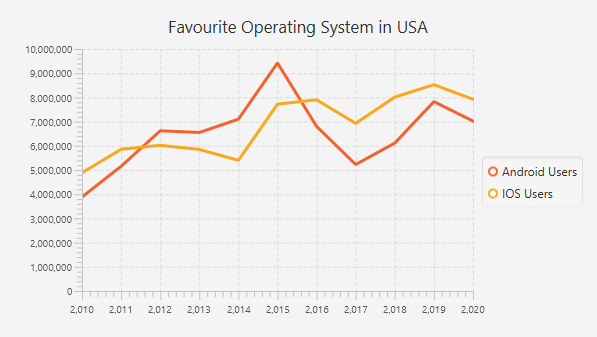

# 1 - Training Loss & Validation Loss

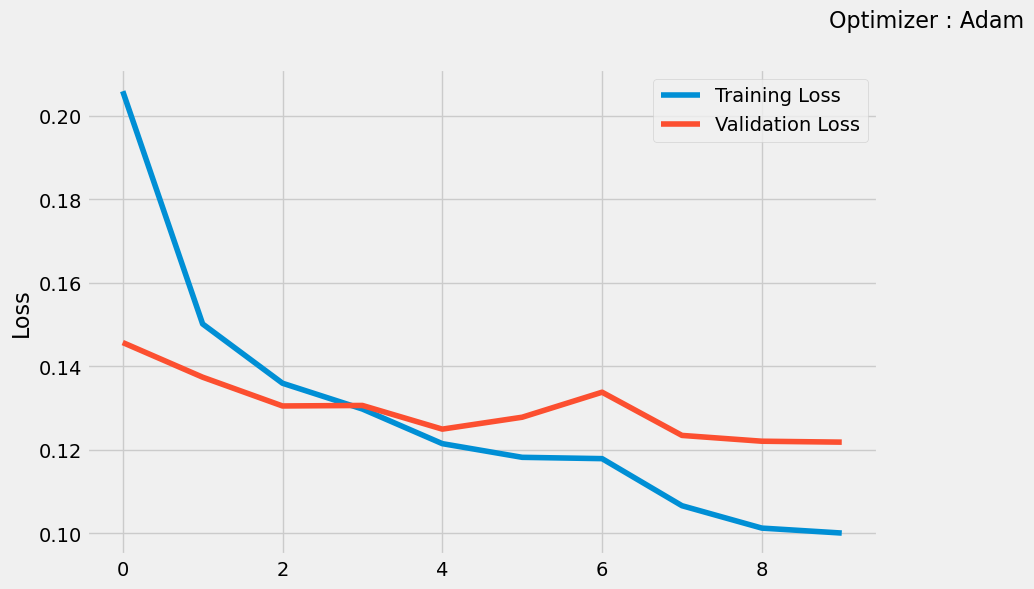

In [16]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# 2 - Taining Accuracy & Validation Accuracy 

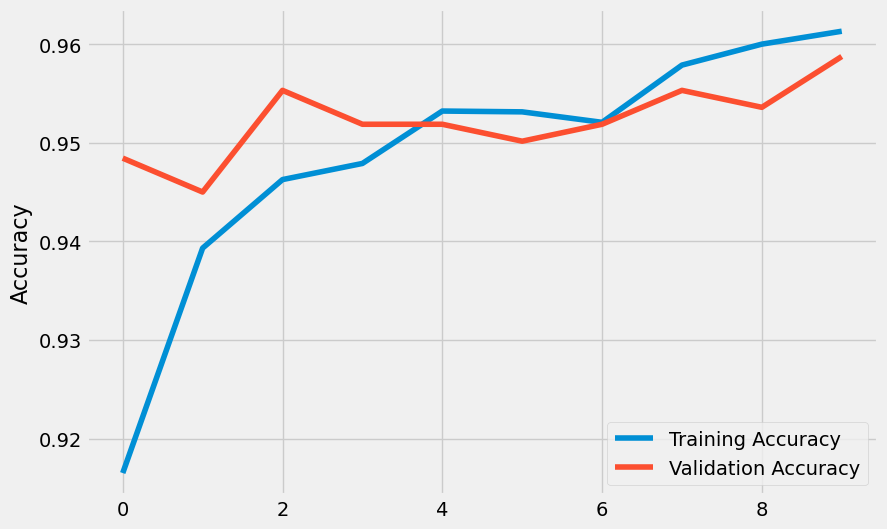

In [17]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# 3 - Train Accuracies

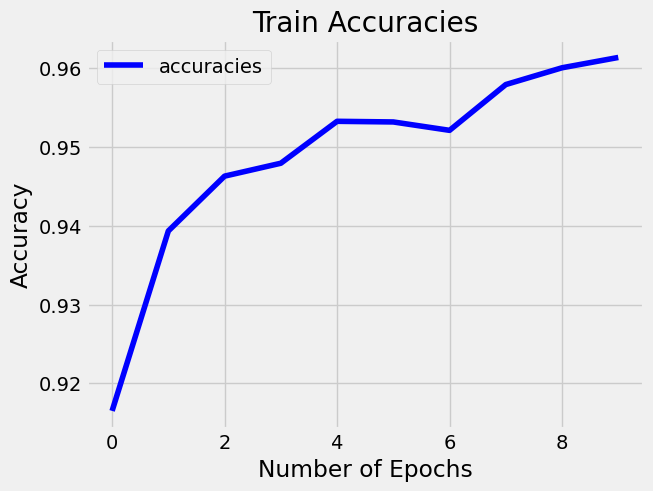

In [18]:
plt.style.use('fivethirtyeight')

plt.plot(history.history['accuracy'], color='b', label="accuracies")
plt.title("Train Accuracies")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 4 - Train Loss

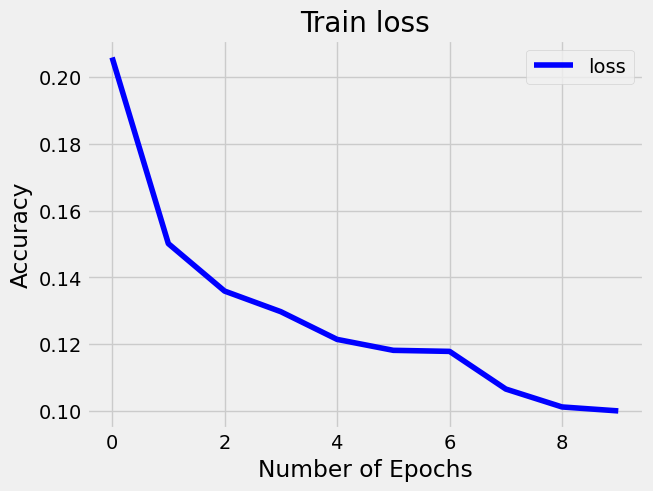

In [19]:
plt.style.use('fivethirtyeight')


plt.plot(history.history['loss'], color='b', label="loss")
plt.title("Train loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 5 - Training Loss & Accuracy

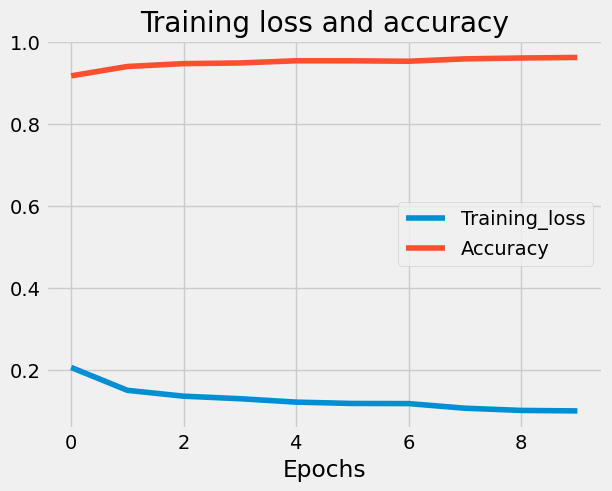

In [21]:
N=10 #epoch
plt.style.use('fivethirtyeight')

plt.plot(np.arange(0,N),history.history['loss'],label='Training_loss')
plt.plot(np.arange(0,N),history.history['accuracy'],label='Accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.legend(loc='right')

# Prelude to Prediction

In [22]:
predictions = model.predict(x_test)
y_pred = [np.argmax(probas) for probas in predictions]
y_val_pred = model.predict(x_val)

37/37 [==============================] - 124s 3s/step


In [23]:
print(y_pred)

[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 

In [24]:
print(y_test)

[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1
 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1
 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1
 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1
 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1
 0 1 0 0 1 0 1 1 0 1 0 0 


# Confusion Matrix
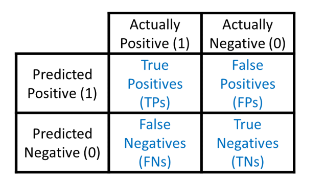

In [25]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<Figure size 640x480 with 0 Axes>

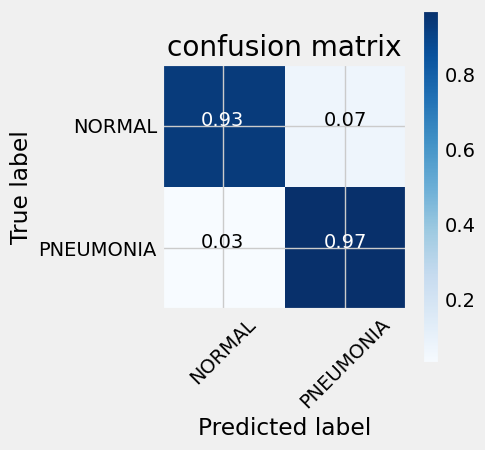

In [26]:
cnf_matrix = confusion_matrix(y_test, y_pred)

np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=CATEGORIES_TRAIN, title='confusion matrix')
plt.show()

# Operations On Confusion Matrix

In [93]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') 
print('ROC AUC Score : ', ROCAUCScore)
print("\n======================================= \n")

PrecisionScore = precision_score(y_test, y_pred, average='micro') 
print('Precision Score (Specificity) is : ', PrecisionScore)
print("\n======================================= \n")

RecallScore = recall_score(y_test, y_pred, average='micro')
print('Recall Score(Sensitivity) is : ', RecallScore)
print("\n======================================= \n")

F1Score = f1_score(y_test, y_pred, average='micro') 
print('F1 Score is : ', F1Score)


ROC AUC Score :  0.950313740555769


Precision Score (Specificity) is :  0.9587628865979382


Recall Score(Sensitivity) is :  0.9587628865979382


F1 Score is :  0.9587628865979382


# Report About Confusion Matrix

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred,target_names = ['Normal','Pnuemonia']))

              precision    recall  f1-score   support

      Normal       0.93      0.93      0.93       171
   Pnuemonia       0.97      0.97      0.97       411

    accuracy                           0.96       582
   macro avg       0.95      0.95      0.95       582
weighted avg       0.96      0.96      0.96       582



# Operations On Confusion Matrix

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print("accuracy     =:    " ,format(round(acc[-1]*100,2)))
print("val_accuracy =:    " ,format(round(val_acc[-1]*100,2)))
print("loss         =:    " ,format(round(loss[-1]*100,2)))
print("val_loss     =:    " ,format(round(val_loss[-1]*100,2)))

accuracy     =:     96.13
val_accuracy =:     95.88
loss         =:     10.0
val_loss     =:     12.18


# Prediction
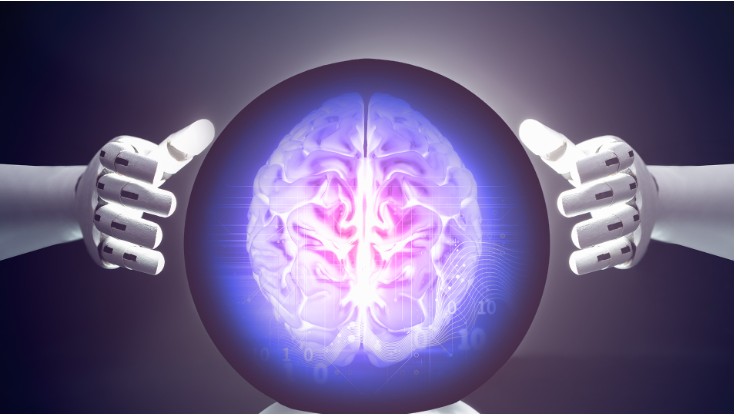

1/1 [==============================] - 0s 290ms/step
1
This image is :  PNEUMONIA


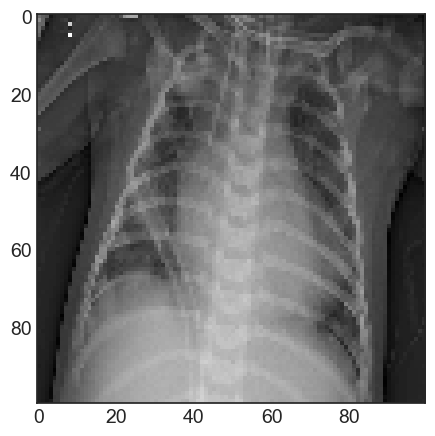

In [120]:
# Predict random image
plt.style.use('seaborn-white')

k = random.randint(0, (len(x_test)))
pred1 = model.predict(x_test[k].reshape(1, 100, 100, 1))
print(pred1.argmax())
print("This image is : ", CATEGORIES_TEST[pred1.argmax()])

pic2 = x_test[k].reshape(100, 100)
vmin = np.amin(pic2)
vmax = np.amax(pic2)
plt.imshow(pic2, cmap='gray', vmin=vmin, vmax=vmax)


In [112]:
# PREDICT MANUAL
def prepare(filepath):
    im=cv2.imread(filepath)
    new_img=cv2.resize(im,(IMG_SIZE,IMG_SIZE))
    return new_img

In [123]:
image = "valid/PNEUMONIA/person14_bacteria_51_jpeg.rf.0c42cdacfc89def78988e0019f4cd49f.jpg"
prediction=model.predict(np.array([prepare(image)]))
print(prediction)

1/1 [==============================] - 0s 262ms/step
[[1.44e-04 1.00e+00]]


In [122]:
# CONVERT prediction TO ARRAY(0,1)
rounded_prediction = np.round(prediction)
print(rounded_prediction)

[[0. 1.]]


This image is classified as PNEUMONIA.


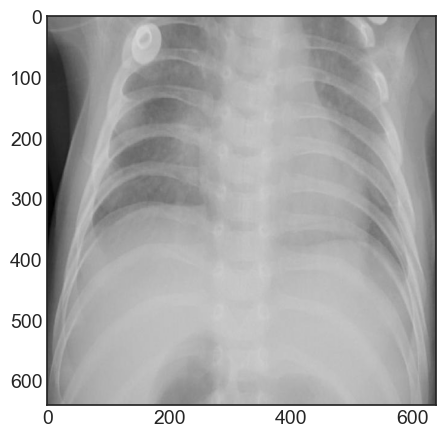

In [117]:
if rounded_prediction[0][0] == 1:
    print("This image is classified as NORMAL.")
else:
    print("This image is classified as PNEUMONIA.")
    
img = cv2.imread(image)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# ROC AUC Curve

ROC AUC score: 0.9503137405557691


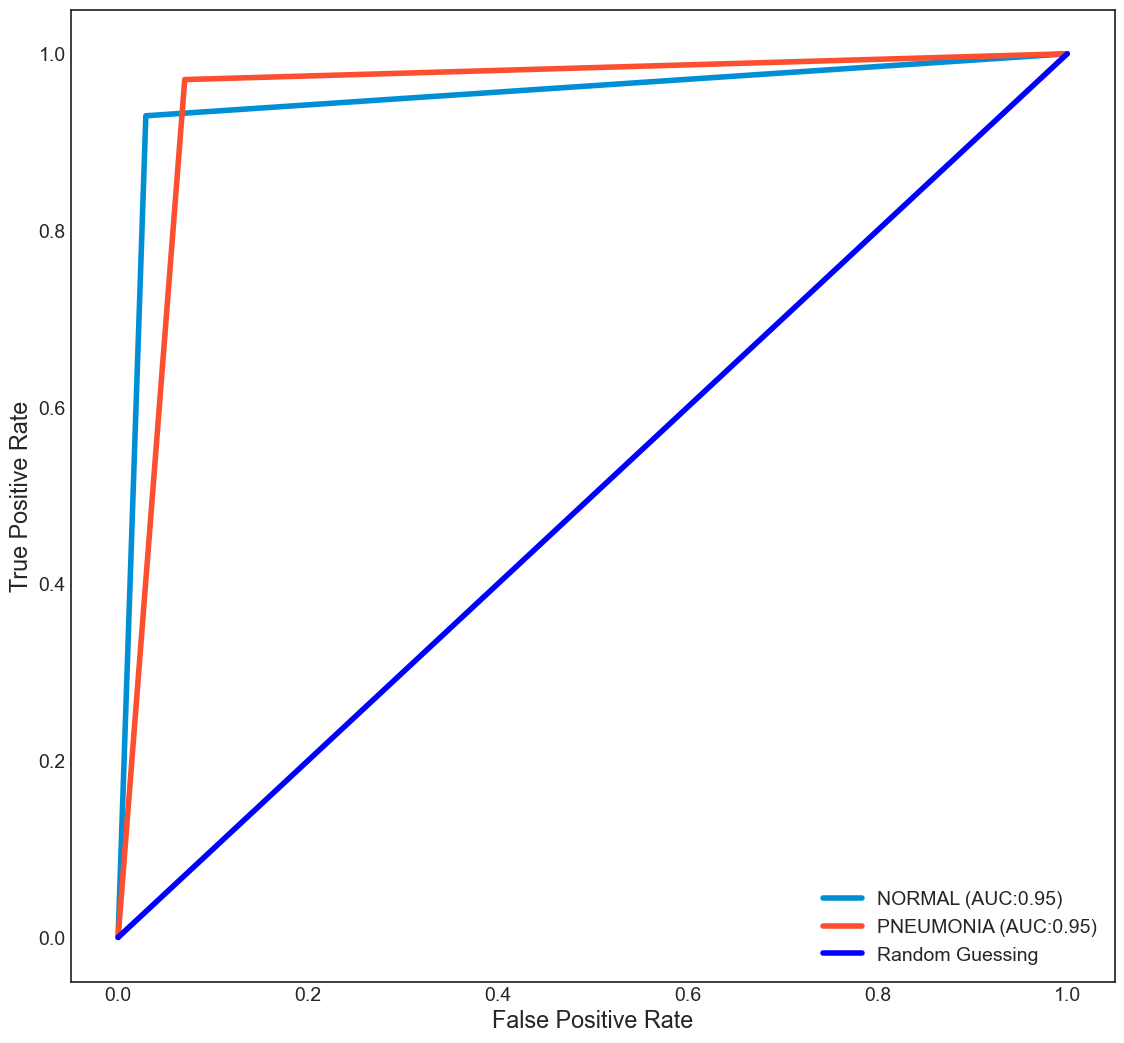

In [69]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.utils import to_categorical


CATEGORIES = ["NORMAL", "PNEUMONIA"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 12))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(CATEGORIES):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)



# convert y_test and y_pred to one-hot encoding format
y_test_onehot = to_categorical(y_test)
y_pred_onehot = to_categorical(y_pred)

# calculate ROC AUC score
print('ROC AUC score:', multiclass_roc_auc_score(y_test_onehot, y_pred_onehot))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()